In [2]:
%matplotlib inline
import matplotlib
import numpy as np
from scipy.linalg import svd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

# Bimodal distribution

### generate random data

In [3]:
np.random.seed(1) # random seed for consistency
N = 200

mu_vec1 = np.array([0,0,-0.5])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,0.05]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, N).T

mu_vec2 = np.array([0,0,0.5])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,0.05]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, N).T

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
cols = np.array([(1.0, 0.2, 0.2)]*N + [(0.5, 0.5, 1)]*N)


### plot data in 3D

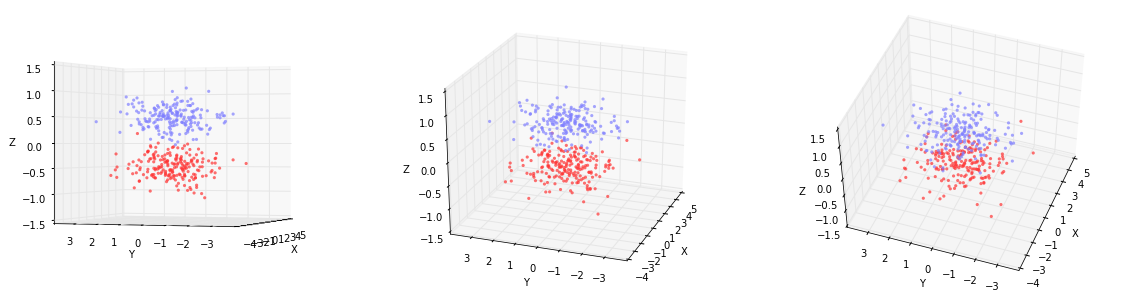

In [4]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(all_samples[0,:], all_samples[1,:], all_samples[2,:], s=10, c=cols, alpha=0.7, linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.view_init(elev=0., azim=200)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter(all_samples[0,:], all_samples[1,:], all_samples[2,:], s=10, c=cols, alpha=0.7, linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.view_init(elev=25, azim=200)

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter(all_samples[0,:], all_samples[1,:], all_samples[2,:], s=10, c=cols, alpha=0.7, linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.view_init(elev=50, azim=200)

plt.show()

### performing eigenvalue decomposition on covariance matrix

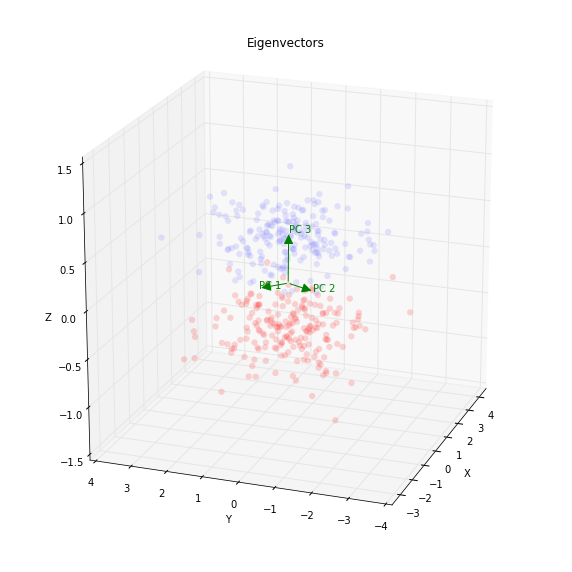

In [5]:
# eigenvectors and eigenvalues for the from the covariance matrix
X_centered = all_samples - np.matrix(np.mean(all_samples, 1)).T * np.ones((1, all_samples.shape[1]))
eig_vec, eig_val, _ = svd(X_centered / np.sqrt(all_samples.shape[1] - 1))


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
mu = np.mean(all_samples, 1)
ax.scatter(all_samples[0,:], all_samples[1,:], all_samples[2,:], s=40, c=cols, alpha=0.2, linewidth=0)
for i in xrange(3):
    end = mu + eig_vec[:, i] * eig_val[i]
    end_plus = mu + eig_vec[:, i] * eig_val[i]
    a = Arrow3D([mu[0], end[0]], [mu[1], end[1]], [mu[2], end[2]], mutation_scale=20, lw=1, arrowstyle="-|>", color="g")
    ax.add_artist(a)
    ax.text(end_plus[0], end_plus[1], end_plus[2], 'PC %d' % (i+1), color='g')
ax.axis('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=200)
ax.set_title('Eigenvectors')
plt.show()

### Projecting to 2D using PCA

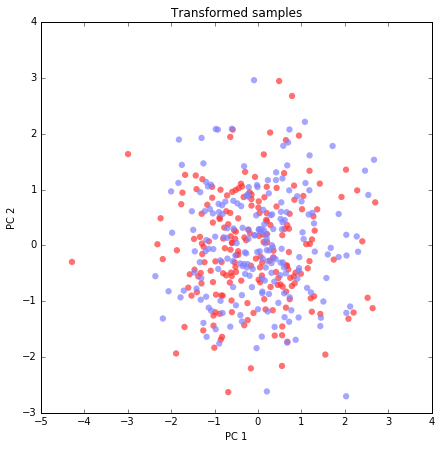

In [6]:
transformed = eig_vec[:, 0:2].T.dot(all_samples)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(transformed[0,:], transformed[1,:], s=40, c=cols, alpha=0.7, linewidth=0)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Transformed samples')
plt.show()

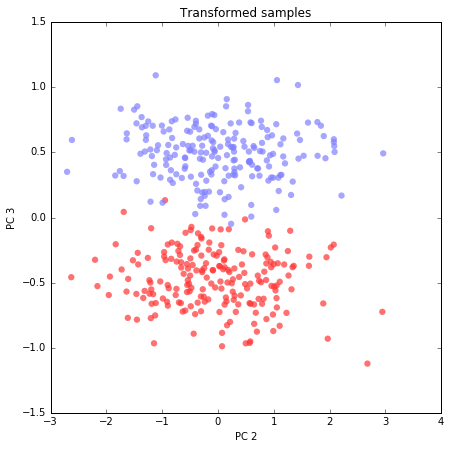

In [7]:
transformed = eig_vec[:, 1:3].T.dot(all_samples)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.scatter(transformed[0,:], transformed[1,:], s=40, c=cols, alpha=0.7, linewidth=0)
plt.xlabel('PC 2')
plt.ylabel('PC 3')
plt.title('Transformed samples')
plt.show()